In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('baseball.csv')

In [4]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [6]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [7]:
df.shape

(30, 17)

In [8]:
df.isnull()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No Null values.

In [10]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


skewness present in AB,H,HR,BB,SO,RA,ER and E.
outliers are present in R,ERA,SHO amd E columns.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [12]:
df_cor=df.corr()

In [13]:
df_cor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


W is highly correlate with SV,BB,SHO,R and 2B.
W is least correalte with ERA,ER and RA.

<AxesSubplot:>

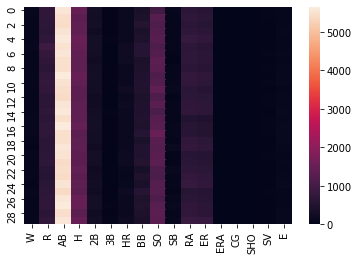

In [14]:
sns.heatmap(df)

No null values.

<AxesSubplot:>

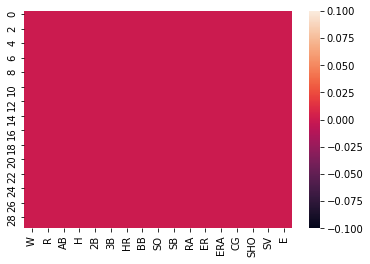

In [15]:
sns.heatmap(df.isnull())

No Null values.

<AxesSubplot:>

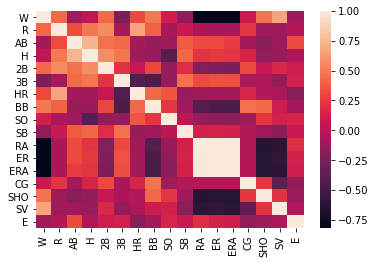

In [16]:
sns.heatmap(df_cor)

W is highly correlate with SV,BB,SHO,R and 2B.
W is least correlate with RA,ER and ERA.

<AxesSubplot:>

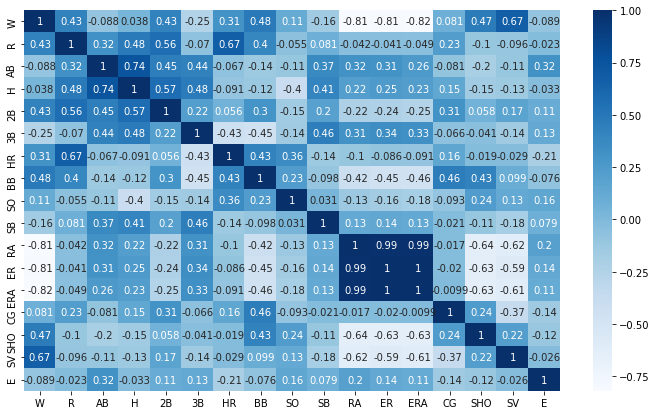

In [17]:
plt.figure(figsize=(12,7))
sns.heatmap(df_cor,cmap='Blues',annot=True)

W is highly correlate with SV,BB,SHO,R and 2B.
W is least correalte with ERA,ER and RA.

<AxesSubplot:>

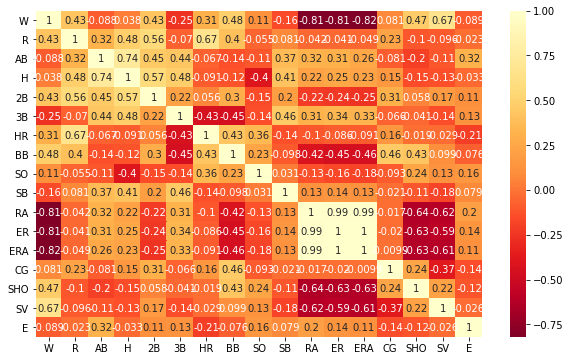

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cor,cmap='YlOrRd_r',annot=True)

W is highly correlate with SV,BB,SHO,R and 2B.
W is least correalte with ERA,ER and RA.

In [19]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

<AxesSubplot:xlabel='R', ylabel='Density'>

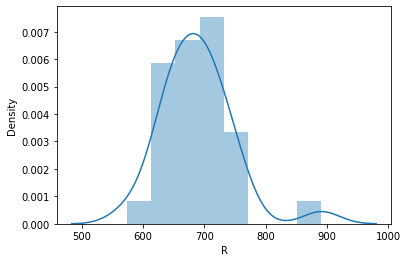

In [20]:
sns.distplot(df['R'])

skewness present.

<AxesSubplot:xlabel='AB', ylabel='Density'>

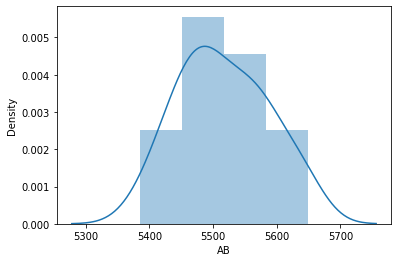

In [21]:
sns.distplot(df['AB'])

No Skewness present.

<AxesSubplot:xlabel='H', ylabel='Density'>

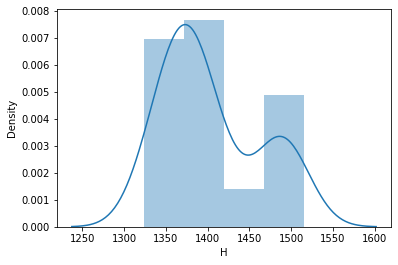

In [22]:
sns.distplot(df['H'])

skewness present.

<AxesSubplot:xlabel='2B', ylabel='Density'>

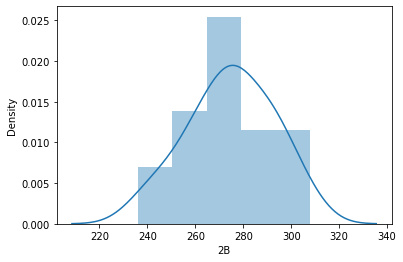

In [23]:
sns.distplot(df['2B'])

No skewness present.

<AxesSubplot:xlabel='3B', ylabel='Density'>

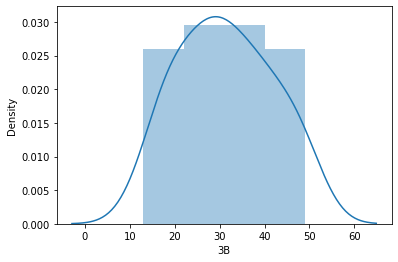

In [24]:
sns.distplot(df['3B'])

No skewness present.

<AxesSubplot:xlabel='HR', ylabel='Density'>

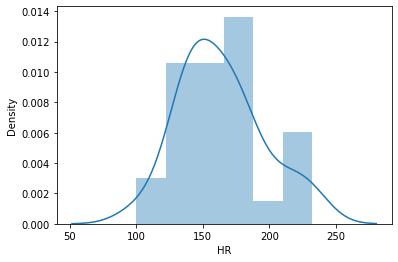

In [25]:
sns.distplot(df['HR'])

No skewness present.

<AxesSubplot:xlabel='BB', ylabel='Density'>

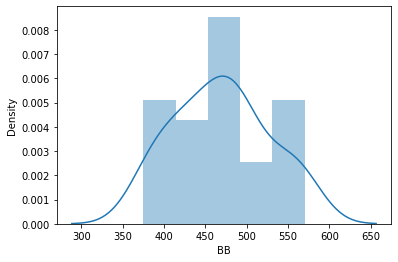

In [26]:
sns.distplot(df['BB'])

No skewness present.

<AxesSubplot:xlabel='SO', ylabel='Density'>

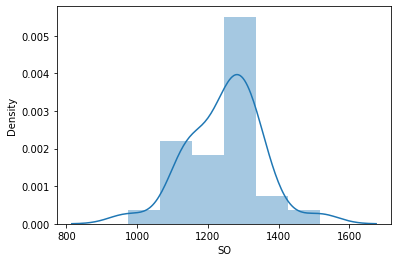

In [27]:
sns.distplot(df['SO'])

No skewness present.

<AxesSubplot:xlabel='SB', ylabel='Density'>

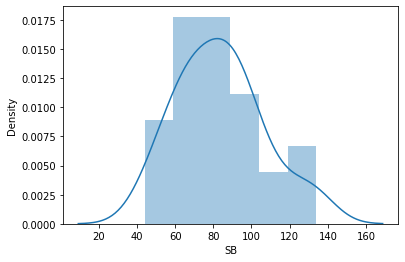

In [28]:
sns.distplot(df['SB'])

No skewness present.

<AxesSubplot:xlabel='RA', ylabel='Density'>

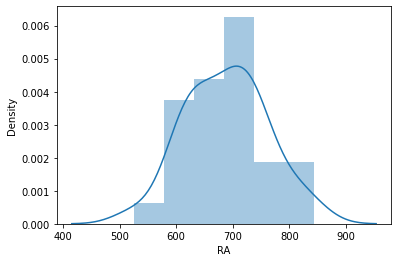

In [29]:
sns.distplot(df['RA'])

No skewness present.

<AxesSubplot:xlabel='ER', ylabel='Density'>

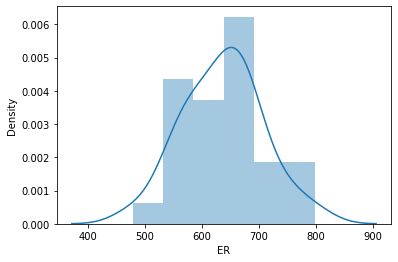

In [30]:
sns.distplot(df['ER'])

No skewness present.

<AxesSubplot:xlabel='ERA', ylabel='Density'>

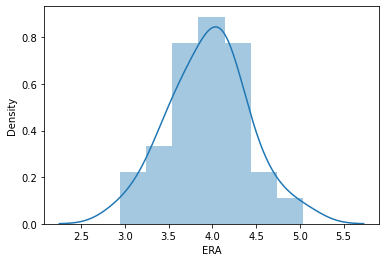

In [31]:
sns.distplot(df['ERA'])

No skewness present.

<AxesSubplot:xlabel='CG', ylabel='Density'>

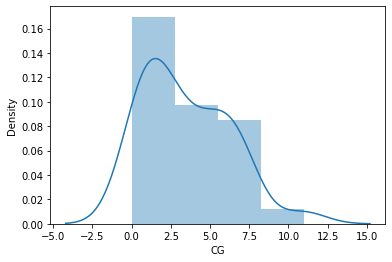

In [32]:
sns.distplot(df['CG'])

skewness present.

<AxesSubplot:xlabel='SHO', ylabel='Density'>

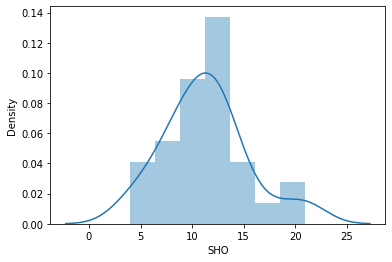

In [33]:
sns.distplot(df['SHO'])

No skewness present.

<AxesSubplot:xlabel='SV', ylabel='Density'>

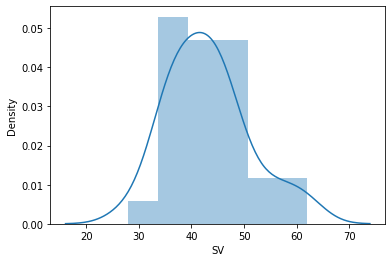

In [34]:
sns.distplot(df['SV'])

skewness present.

<AxesSubplot:xlabel='E', ylabel='Density'>

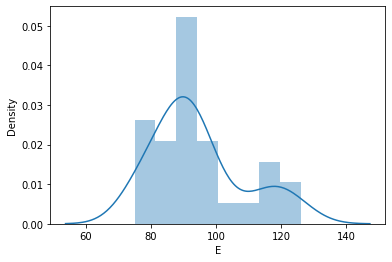

In [35]:
sns.distplot(df['E'])

skewness present.

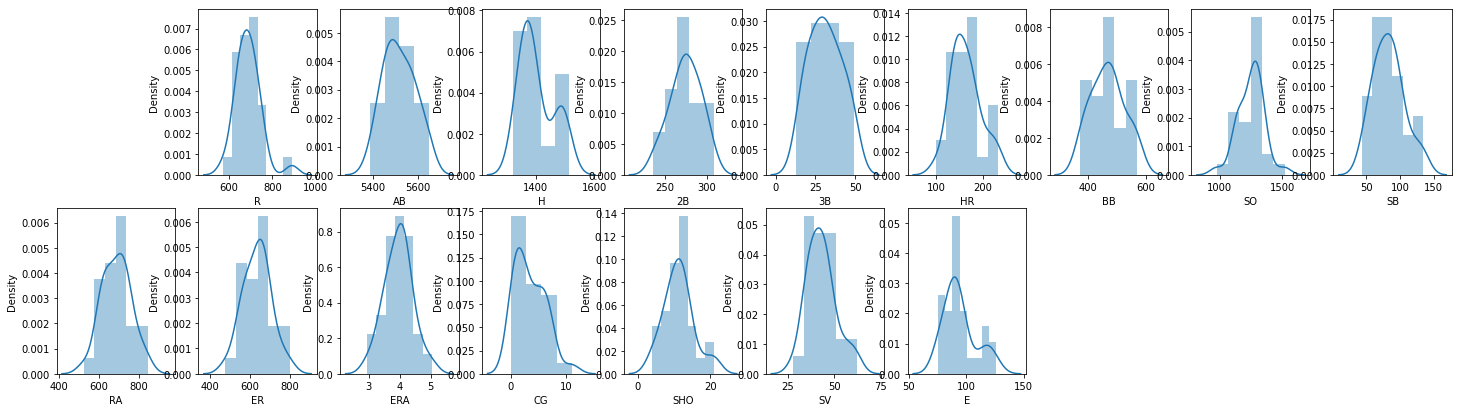

In [36]:
collist=df.columns.values
ncol=10
nrows=7
plt.figure(figsize=(25,25))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [60]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

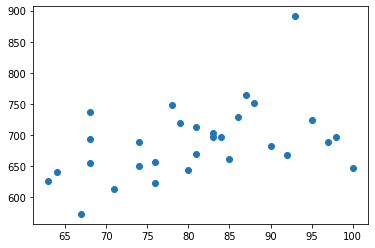

In [61]:
plt.scatter(df['W'],df['R'])

R is scattered from 600 to 750 range with increasing W.

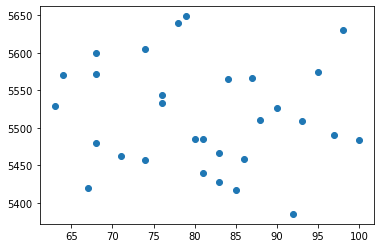

In [62]:
plt.scatter(df['W'],df['AB'])

AB is scattered from 5400 to 5650 range with increasing W.

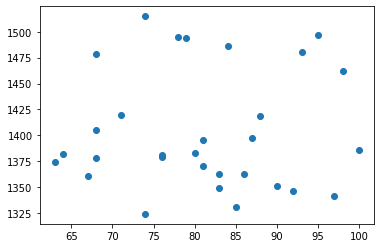

In [63]:
plt.scatter(df['W'],df['H'])

H is scattered from 1325 to 1500 range with increasing W.

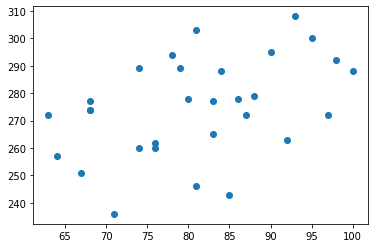

In [64]:
plt.scatter(df['W'],df['2B'])

2B is scattered from 240 to 310 range with increasing W.

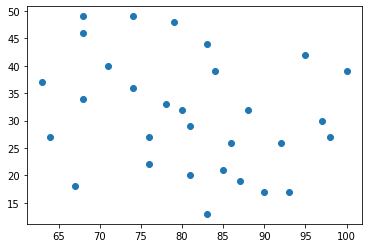

In [65]:
plt.scatter(df['W'],df['3B'])

3B is scattered from 15 to 50 range with increasing W.

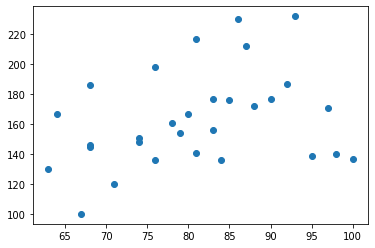

In [66]:
plt.scatter(df['W'],df['HR'])

positive relationship between W and HR.

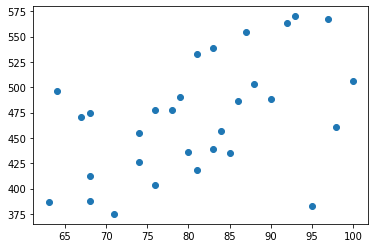

In [67]:
plt.scatter(df['W'],df['BB'])

positive relationship between W and BB.

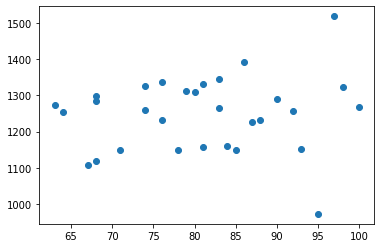

In [68]:
plt.scatter(df['W'],df['SO'])

SO is scattered from 1100 to 1400 range with increasing W.

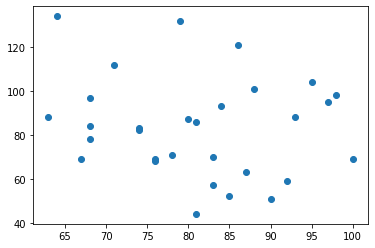

In [69]:
plt.scatter(df['W'],df['SB'])

SB is scattered from 40 to 120 range with increasing W.

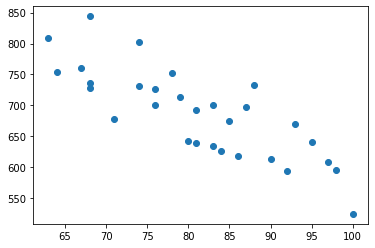

In [70]:
plt.scatter(df['W'],df['RA'])

negative relationship between W and RA.

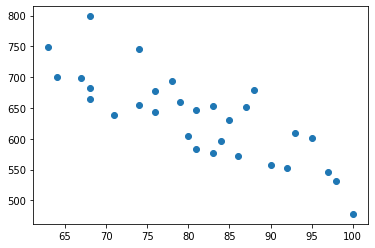

In [71]:
plt.scatter(df['W'],df['ER'])

negative relationship between W and ER.

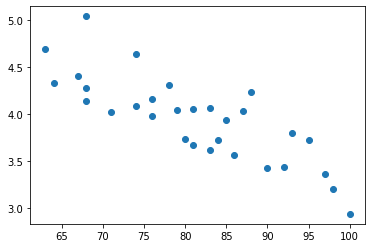

In [72]:
plt.scatter(df['W'],df['ERA'])

negative relationship between W and ERA.

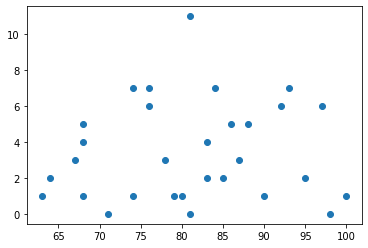

In [73]:
plt.scatter(df['W'],df['CG'])

CG is scattered from 0 to 8 range with increasing W.

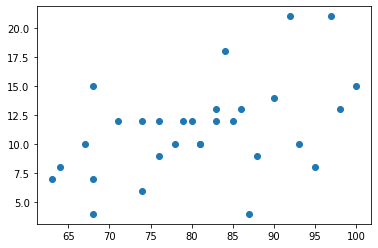

In [74]:
plt.scatter(df['W'],df['SHO'])

SHO is scattered from 5.0 to 20.0 range with increasing W.

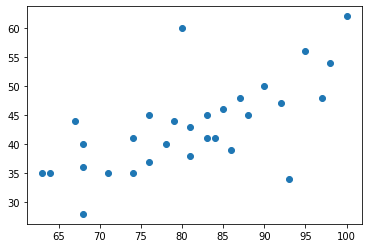

In [75]:
plt.scatter(df['W'],df['SV'])

positive relationship between W and SV.

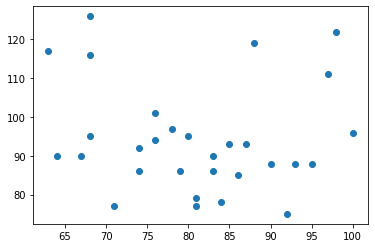

In [76]:
plt.scatter(df['W'],df['E'])

E is scattered from 80 to 120 range with increasing W.

In [78]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

skewness present in R,H,CG,SV and E.

we need to remove skewness.

# Removing skewness

In [79]:
df['R']=np.log1p(df['R'])

In [80]:
df['H']=np.log1p(df['H'])

In [81]:
df['CG']=np.log1p(df['CG'])

In [82]:
df['SV']=np.log1p(df['SV'])

In [83]:
df['E']=np.log1p(df['E'])

In [84]:
df.skew()

W      0.047089
R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO    0.565790
SV     0.163057
E      0.632916
dtype: float64

skewness removed.

In [85]:
df.columns


Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

checking outliers.

<AxesSubplot:>

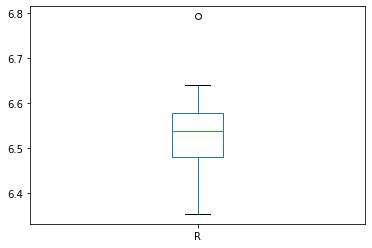

In [87]:
df['R'].plot.box()

 outliers present.

<AxesSubplot:>

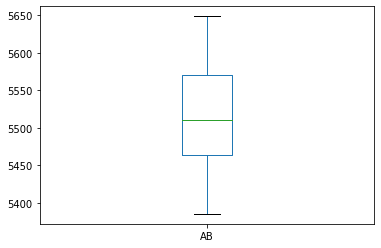

In [88]:
df['AB'].plot.box()

No outliers present.

<AxesSubplot:>

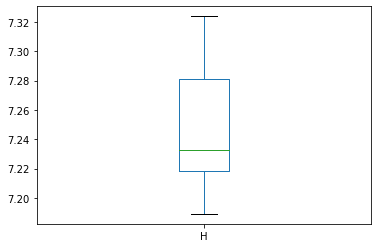

In [89]:
df['H'].plot.box()

No outliers present.

<AxesSubplot:>

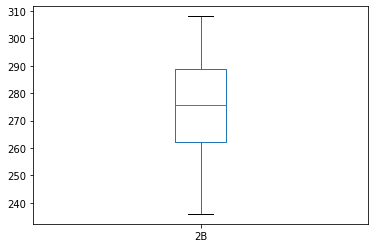

In [90]:
df['2B'].plot.box()

No outliers present.

<AxesSubplot:>

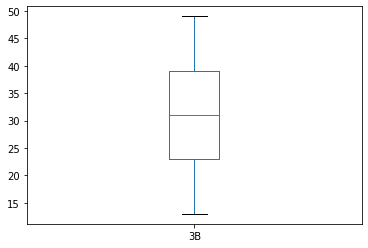

In [91]:
df['3B'].plot.box()

No outliers present.

<AxesSubplot:>

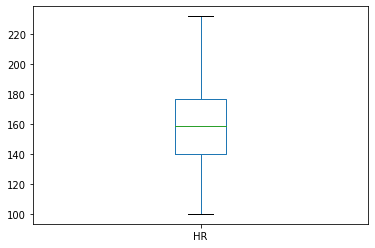

In [92]:
df['HR'].plot.box()

No outliers present.

<AxesSubplot:>

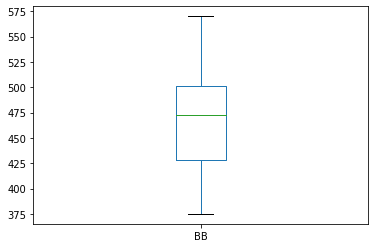

In [93]:
df['BB'].plot.box()

No outliers present.

<AxesSubplot:>

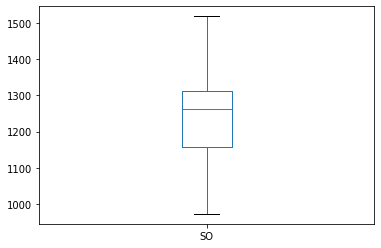

In [94]:
df['SO'].plot.box()

No outliers present.

<AxesSubplot:>

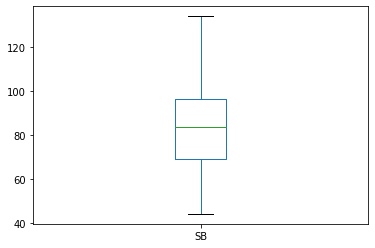

In [95]:
df['SB'].plot.box()

No outliers present.

<AxesSubplot:>

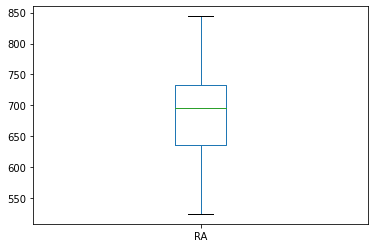

In [96]:
df['RA'].plot.box()

No outliers present.

<AxesSubplot:>

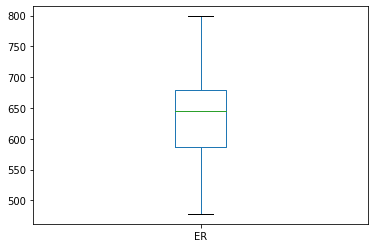

In [97]:
df['ER'].plot.box()

No outliers present.

<AxesSubplot:>

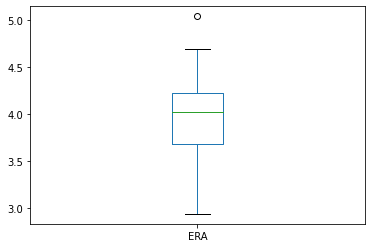

In [98]:
df['ERA'].plot.box()

 outliers present.

<AxesSubplot:>

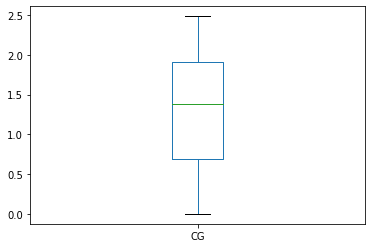

In [99]:
df['CG'].plot.box()

No outliers present.

<AxesSubplot:>

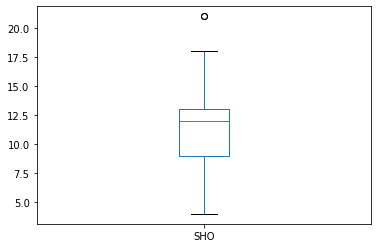

In [100]:
df['SHO'].plot.box()

 outliers present.

<AxesSubplot:>

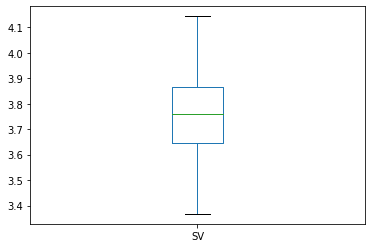

In [101]:
df['SV'].plot.box()

No outliers present.

<AxesSubplot:>

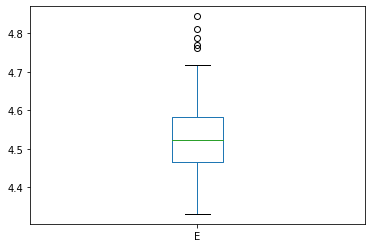

In [102]:
df['E'].plot.box()

 outliers present.

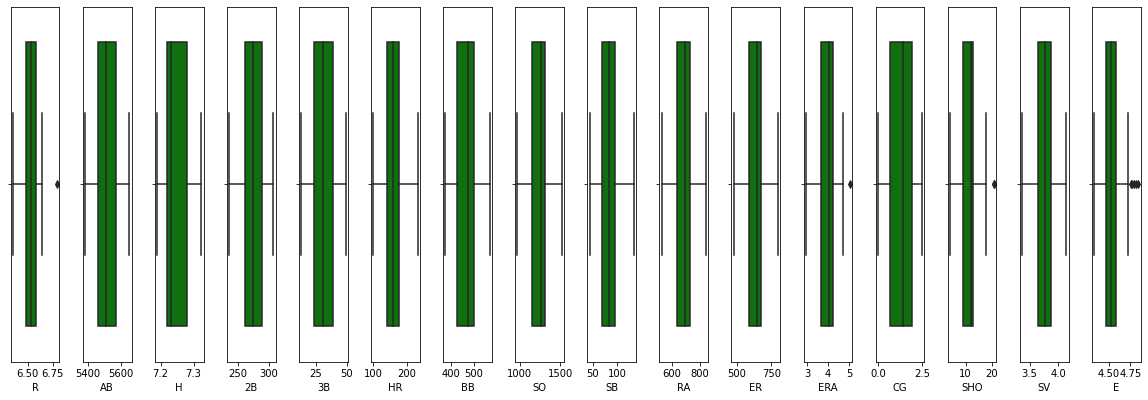

In [137]:
collist=df.columns.values
ncol=22
nrows=20
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

R,SHO and E has  outliers present.

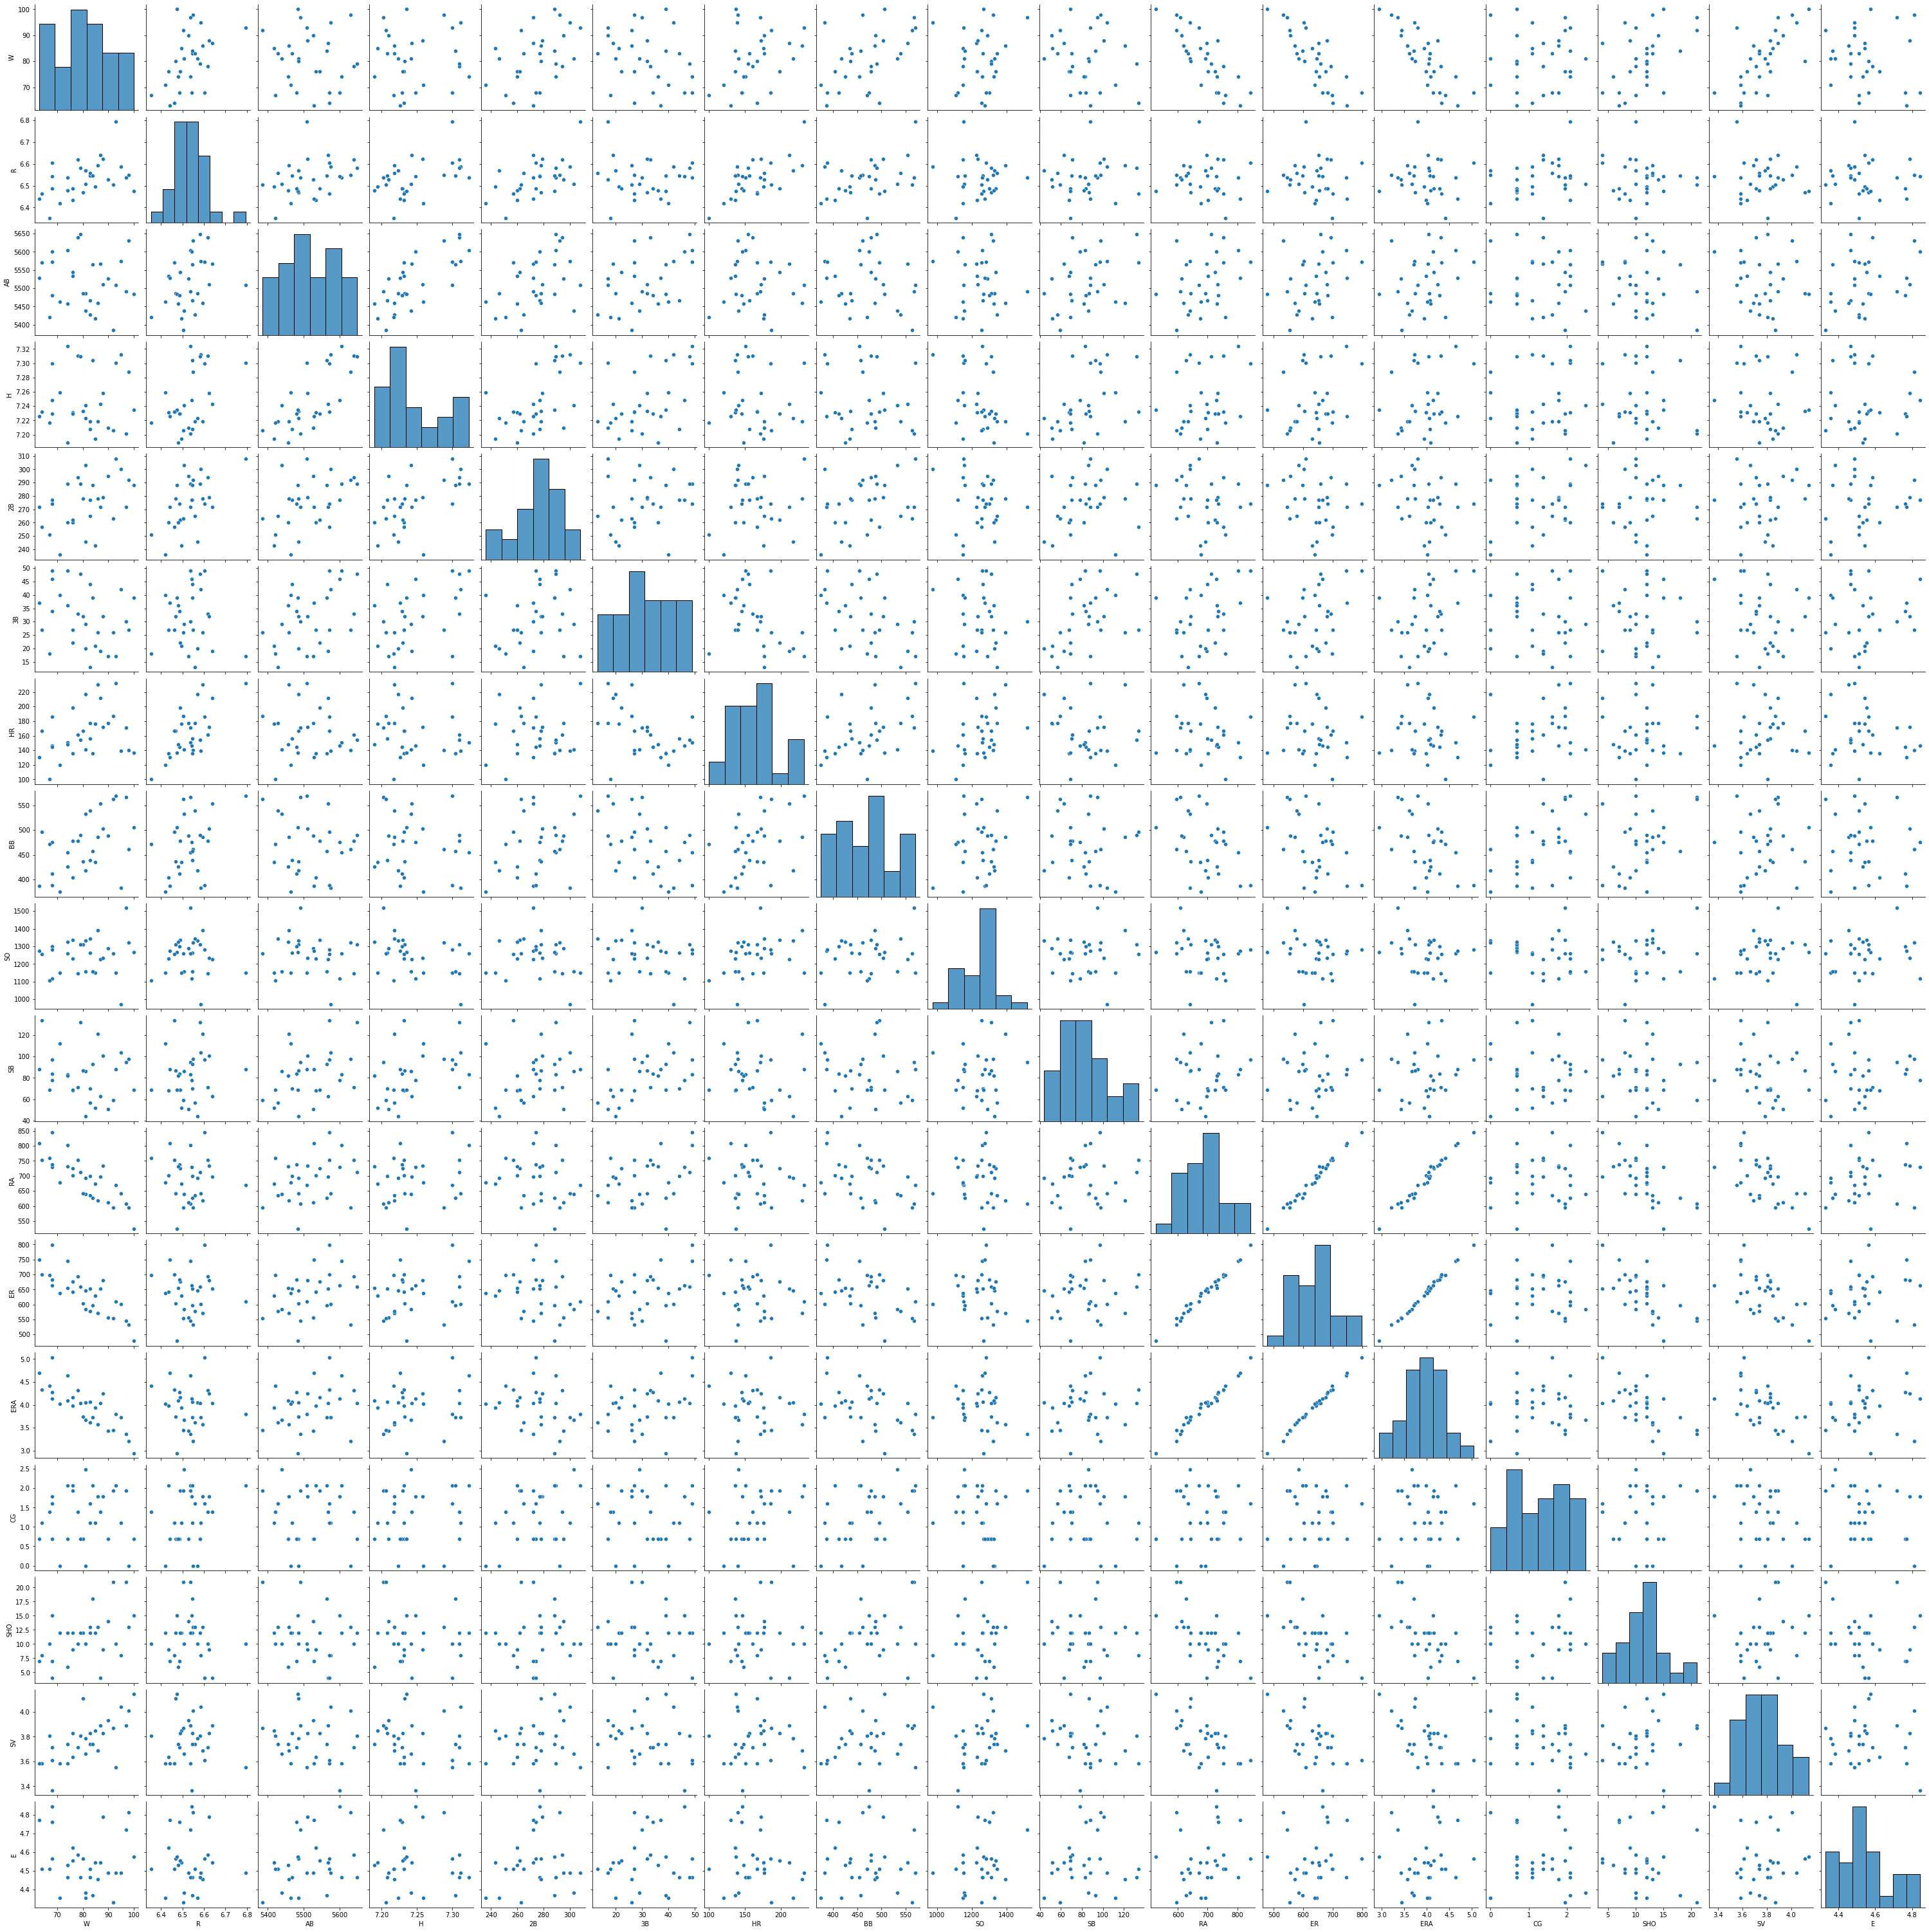

In [133]:
sns.pairplot(df)

# Removing Outliers

In [103]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [104]:
z[5][1]

3.221982961386852

In [106]:
df_new=df[(z<3).all(axis=1)]

In [107]:
df_new.shape

(29, 17)

In [108]:
df.shape

(30, 17)

30-29=1 outlier is removed from dataframe.

In [116]:
x=df_new.iloc[:,1:-1]
y=df_new.iloc[:,0]

In [112]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,6.586172,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,8,4.043051,4.488636
1,6.546785,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,12,3.828641,4.465908
2,6.507278,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,10,3.663562,4.382027
3,6.434547,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,9,3.637586,4.624973
4,6.536692,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,12,3.583519,4.465908
6,6.639876,5567,7.242798,272,19,212,554,1227,63,698,652,4.03,1.386294,4,3.891820,4.543295
7,6.570883,5485,7.223296,246,20,217,418,1331,44,693,646,4.05,0.000000,10,3.784190,4.356709
8,6.469250,5485,7.232733,278,32,167,436,1310,87,642,604,3.74,0.693147,12,4.110874,4.564348
9,6.618739,5640,7.310550,294,33,161,478,1148,71,753,694,4.31,1.386294,10,3.713572,4.584967
10,6.622736,5511,7.258412,279,32,172,503,1233,101,733,680,4.24,1.791759,9,3.828641,4.787492


In [117]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [122]:
lr=LinearRegression()

In [135]:
def getScore(m):
    max_score=0
    max_i=0
    for i in range(0,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
        m.fit(x_train,y_train)
        pred=m.predict(x_test)
        rscore=r2_score(y_test,pred)
        if(rscore>max_score):
            max_score=rscore
            max_i=i
    print("max r2 score",max_score)
    print("max i",max_i)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=max_i)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("mean absolute error:",mean_absolute_error(y_test,pred))
    print("mean squared error",mean_squared_error(y_test,pred))
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred)))

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=43)
lr=LinearRegression()
getScore(lr)

max r2 score 0.8461916833468228
max i 22
mean absolute error: 3.69406820001675
mean squared error 17.81100306843792
Root Mean Squared Error: 4.22030840916134


In [139]:
lr.coef_

array([ 9.50648612e+01, -8.07106784e-02,  8.53900569e+01, -5.83115270e-02,
       -2.22615397e-02, -4.49949057e-02, -4.33170678e-02, -5.49550809e-03,
        2.53182169e-03,  2.26073658e-01,  3.19235406e-01, -9.72385462e+01,
        1.31626415e+00,  7.29526697e-01,  2.44095577e+01])

In [140]:
lr.intercept_

-738.6630600180953

# Regularization :: L1 and L2 Regularization¶

In [141]:
from sklearn.linear_model  import Lasso,Ridge
ls=Lasso(alpha=0.0001)
#ls=Lasso(alpha=1.0) #Default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.979478098193002

In [142]:
ls.coef_

array([ 4.31386003e+01,  6.05385648e-03,  2.33871477e+01, -1.15136330e-01,
        1.90450368e-01,  8.10638272e-02, -1.50564846e-02, -2.32696861e-02,
       -5.14013239e-02,  2.53004419e-01, -2.04542337e-01, -2.29396215e+01,
        2.49975083e+00,  5.62329956e-01,  2.70425076e+01])

In [143]:
rd=Ridge(alpha=0.0001)
#rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.9811670989695893

In [144]:
rd.coef_

array([ 4.37677779e+01, -3.04332761e-02,  4.64711427e+01, -9.30484094e-02,
        1.45345171e-01,  6.52160690e-02, -1.74139413e-02, -1.88963978e-02,
       -4.49567184e-02,  1.85982000e-01,  2.05392640e-01, -7.54247081e+01,
        2.51681981e+00,  4.92725164e-01,  2.63471376e+01])

In [145]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
#enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.9792201685429599


array([ 4.06689407e+01,  1.01168196e-02,  1.93614600e+01, -1.11953984e-01,
        1.95749613e-01,  8.47671167e-02, -1.47236037e-02, -2.33431992e-02,
       -5.20850097e-02,  2.49003228e-01, -2.28865537e-01, -1.85794538e+01,
        2.49093731e+00,  5.61977574e-01,  2.70369331e+01])

# cross validation

In [153]:
score=cross_val_score(lr,x,y,cv=8)
print(score)
print(score.mean(),score.std())

[ 0.92838172 -0.58918664  0.36163453  0.6640764   0.83061742  0.51550272
  0.89247328 -0.03296382]
0.4463169505945196 0.49250424645779683


# Ensemble Techniques

In [154]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=42)
#by default n_estimators=100
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))

0.4705269326683291
42.46374


In [155]:
from sklearn.ensemble import AdaBoostRegressor

ab=AdaBoostRegressor(n_estimators=100,random_state=42)
#by default n_estimators=100
ab.fit(x_train,y_train)
predab=ab.predict(x_test)
print(r2_score(y_test,predab))
print(mean_squared_error(y_test,predab))

0.46695760598503744
42.75


# Saving the model

saving the linear regression object. 

In [156]:
import joblib
joblib.dump(lr,'lrfile.obj')

['lrfile.obj']

In [157]:
file=joblib.load('lrfile.obj')

In [158]:
file.predict(x_test)

array([93.77463055, 75.94542555, 69.83816426, 78.97782521, 85.23514303,
       80.08081841, 85.3917706 , 57.80904435, 85.77722865, 62.67120134])